<a href="https://colab.research.google.com/github/EliAckah/Machine-Learning-Projects/blob/main/Predicting_total_Green_House_Gas_emissions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import  ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder



In [2]:
#load the dataset
energy_dataset = pd.read_csv('/content/drive/MyDrive/Machine Learning/2016_Building_Energy_Benchmarking_20240815.csv')

In [3]:
#print the first few rows
print(energy_dataset.head())

   OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2016  NonResidential               Hotel   
1              2      2016  NonResidential               Hotel   
2              3      2016  NonResidential               Hotel   
3              5      2016  NonResidential               Hotel   
4              8      2016  NonResidential               Hotel   

                  PropertyName          Address     City State  ZipCode  \
0         Mayflower park hotel    405 Olive way  Seattle    WA  98101.0   
1              Paramount Hotel  724 Pine street  Seattle    WA  98101.0   
2      5673-The Westin Seattle  1900 5th Avenue  Seattle    WA  98101.0   
3                    HOTEL MAX   620 STEWART ST  Seattle    WA  98101.0   
4  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  Seattle    WA  98121.0   

  TaxParcelIdentificationNumber  ...  Electricity(kWh) Electricity(kBtu)  \
0                    0659000030  ...      1.156514e+06         3946027.0   


In [4]:
# check statistical measures
print(energy_dataset.describe())

       OSEBuildingID  DataYear       ZipCode  CouncilDistrictCode  \
count    3376.000000    3376.0   3360.000000          3376.000000   
mean    21208.991114    2016.0  98116.949107             4.439277   
std     12223.757015       0.0     18.615205             2.120625   
min         1.000000    2016.0  98006.000000             1.000000   
25%     19990.750000    2016.0  98105.000000             3.000000   
50%     23112.000000    2016.0  98115.000000             4.000000   
75%     25994.250000    2016.0  98122.000000             7.000000   
max     50226.000000    2016.0  98272.000000             7.000000   

          Latitude    Longitude    YearBuilt  NumberofBuildings  \
count  3376.000000  3376.000000  3376.000000        3368.000000   
mean     47.624033  -122.334795  1968.573164           1.106888   
std       0.047758     0.027203    33.088156           2.108402   
min      47.499170  -122.414250  1900.000000           0.000000   
25%      47.599860  -122.350662  1948.00000

In [5]:
# the columns in the dataset
print(energy_dataset.columns)

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

In [6]:
energy_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [7]:
# check if any missing values exist
has_missing = energy_dataset.isnull().values.any()
print(has_missing)

True


In [8]:
# check for missing values in each column
col_missing_values = energy_dataset.isnull().sum()
print(col_missing_values)

OSEBuildingID                         0
DataYear                              0
BuildingType                          0
PrimaryPropertyType                   0
PropertyName                          0
Address                               0
City                                  0
State                                 0
ZipCode                              16
TaxParcelIdentificationNumber         0
CouncilDistrictCode                   0
Neighborhood                          0
Latitude                              0
Longitude                             0
YearBuilt                             0
NumberofBuildings                     8
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
ListOfAllPropertyUseTypes             9
LargestPropertyUseType               20
LargestPropertyUseTypeGFA            20
SecondLargestPropertyUseType       1697
SecondLargestPropertyUseTypeGFA    1697


In [9]:
# calculate percentage for each row with missing values
missing_percentage = energy_dataset.isnull().mean() * 100
print(missing_percentage)

OSEBuildingID                        0.000000
DataYear                             0.000000
BuildingType                         0.000000
PrimaryPropertyType                  0.000000
PropertyName                         0.000000
Address                              0.000000
City                                 0.000000
State                                0.000000
ZipCode                              0.473934
TaxParcelIdentificationNumber        0.000000
CouncilDistrictCode                  0.000000
Neighborhood                         0.000000
Latitude                             0.000000
Longitude                            0.000000
YearBuilt                            0.000000
NumberofBuildings                    0.236967
NumberofFloors                       0.000000
PropertyGFATotal                     0.000000
PropertyGFAParking                   0.000000
PropertyGFABuilding(s)               0.000000
ListOfAllPropertyUseTypes            0.266588
LargestPropertyUseType            

In [10]:
# create a copy of the dataframe
energy_dataset_copy = energy_dataset.copy()

Preprocessing Steps

In [11]:
# Drop columns where more than 50% of the data is missing
energy_dataset_cleaned = energy_dataset_copy.dropna(thresh=energy_dataset_copy.shape[0] * 0.5, axis = 1 )

In [12]:
print(energy_dataset_cleaned.isnull().mean()*100)

OSEBuildingID                     0.000000
DataYear                          0.000000
BuildingType                      0.000000
PrimaryPropertyType               0.000000
PropertyName                      0.000000
Address                           0.000000
City                              0.000000
State                             0.000000
ZipCode                           0.473934
TaxParcelIdentificationNumber     0.000000
CouncilDistrictCode               0.000000
Neighborhood                      0.000000
Latitude                          0.000000
Longitude                         0.000000
YearBuilt                         0.000000
NumberofBuildings                 0.236967
NumberofFloors                    0.000000
PropertyGFATotal                  0.000000
PropertyGFAParking                0.000000
PropertyGFABuilding(s)            0.000000
ListOfAllPropertyUseTypes         0.266588
LargestPropertyUseType            0.592417
LargestPropertyUseTypeGFA         0.592417
ENERGYSTARS

In [13]:
energy_data = energy_dataset_cleaned.drop(['DefaultData','OSEBuildingID','DataYear','State','TaxParcelIdentificationNumber','CouncilDistrictCode','Neighborhood', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)','GHGEmissionsIntensity','SiteEnergyUseWN(kBtu)'], axis = 1)

In [14]:
energy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   BuildingType               3376 non-null   object 
 1   PrimaryPropertyType        3376 non-null   object 
 2   PropertyName               3376 non-null   object 
 3   Address                    3376 non-null   object 
 4   City                       3376 non-null   object 
 5   ZipCode                    3360 non-null   float64
 6   Latitude                   3376 non-null   float64
 7   Longitude                  3376 non-null   float64
 8   YearBuilt                  3376 non-null   int64  
 9   NumberofBuildings          3368 non-null   float64
 10  NumberofFloors             3376 non-null   int64  
 11  PropertyGFATotal           3376 non-null   int64  
 12  PropertyGFAParking         3376 non-null   int64  
 13  PropertyGFABuilding(s)     3376 non-null   int64

In [15]:
# separate target from features
X = energy_data.drop(['SiteEnergyUse(kBtu)'], axis = 1)
y = energy_data['SiteEnergyUse(kBtu)']


In [16]:
# divide data into training and validation subsets
X_train_f, X_valid_f, y_train, y_valid = train_test_split(X, y, train_size = 0.8, test_size =0.2, random_state=0)

In [17]:
# select categorical columns with relatively low cardinality
categorical_cols = [cname for cname in X_train_f.columns if X_train_f[cname].nunique() < 10 and
                    X_train_f[cname].dtype == 'object']

In [18]:
# select numerical columns
numerical_cols = [cname for cname in X_train_f.columns if X_train_f[cname].dtype in ['int64','float64']]

In [19]:
# keep selected columns
cols = categorical_cols + numerical_cols
X_train = X_train_f[cols].copy()
X_valid = X_valid_f[cols].copy()

In [20]:
X_train.head()

,BuildingType,City,ComplianceStatus,ZipCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,LargestPropertyUseTypeGFA,ENERGYSTARScore,SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions
2447,NonResidential,Seattle,Compliant,98122.0,47.61478,-122.31847,1916,1.0,2,36940,...,36940.0,100.0,28.600000,28.600000,0.0,9.869440e+04,336745.0,0.000000,0.0,2.35
2559,NonResidential,Seattle,Compliant,98133.0,47.71387,-122.35350,1938,1.0,2,23222,...,15006.0,62.0,114.699997,123.699997,0.0,6.177110e+04,210763.0,10091.000000,1009100.0,55.06
137,SPS-District K-12,Seattle,Compliant,98126.0,47.52915,-122.36511,2010,1.0,2,367884,...,367884.0,97.0,81.599998,85.900002,0.0,2.404754e+06,8205020.0,40604.957030,4060496.0,272.85
2165,Multifamily LR (1-4),Seattle,Compliant,98126.0,47.51907,-122.36822,2000,1.0,2,49501,...,49501.0,56.0,109.599998,116.400002,0.0,5.064834e+05,1728121.0,0.000000,0.0,12.05
1969,Nonresidential COS,Seattle,Compliant,98134.0,47.58290,-122.32417,1985,1.0,1,22803,...,19373.0,78.0,73.099998,77.000000,0.0,1.212340e+05,413650.0,3504.440186,350444.0,21.50


In [21]:
# preprocessing of numerical data
numerical_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy='constant')),
    ('scaler', StandardScaler())
])


In [22]:
# preprocessing for categorical data
categorical_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])



In [23]:
# bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers = [
        ('num', numerical_transformer, numerical_cols),
        ('cat',categorical_transformer, categorical_cols)
    ]
)

In [24]:
X_train.head()

,BuildingType,City,ComplianceStatus,ZipCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,LargestPropertyUseTypeGFA,ENERGYSTARScore,SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions
2447,NonResidential,Seattle,Compliant,98122.0,47.61478,-122.31847,1916,1.0,2,36940,...,36940.0,100.0,28.600000,28.600000,0.0,9.869440e+04,336745.0,0.000000,0.0,2.35
2559,NonResidential,Seattle,Compliant,98133.0,47.71387,-122.35350,1938,1.0,2,23222,...,15006.0,62.0,114.699997,123.699997,0.0,6.177110e+04,210763.0,10091.000000,1009100.0,55.06
137,SPS-District K-12,Seattle,Compliant,98126.0,47.52915,-122.36511,2010,1.0,2,367884,...,367884.0,97.0,81.599998,85.900002,0.0,2.404754e+06,8205020.0,40604.957030,4060496.0,272.85
2165,Multifamily LR (1-4),Seattle,Compliant,98126.0,47.51907,-122.36822,2000,1.0,2,49501,...,49501.0,56.0,109.599998,116.400002,0.0,5.064834e+05,1728121.0,0.000000,0.0,12.05
1969,Nonresidential COS,Seattle,Compliant,98134.0,47.58290,-122.32417,1985,1.0,1,22803,...,19373.0,78.0,73.099998,77.000000,0.0,1.212340e+05,413650.0,3504.440186,350444.0,21.50


In [25]:
# fit the preprocessor on the training data and transform it
X_trainp = preprocessor.fit_transform(X_train)

In [26]:
# for categorical features, one-hot encoding creates new columns
feature_names = numerical_cols + list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_cols))


In [27]:
# convert X_trainp to a dataframe
X_trainfinal = pd.DataFrame(X_trainp, columns = feature_names)

# display the first few rows
print(X_trainfinal.head())

    ZipCode  Latitude  Longitude  YearBuilt  NumberofBuildings  \
0  0.061815 -0.196334   0.607591  -1.572940          -0.049935   
1  0.063661  1.876560  -0.681026  -0.910940          -0.049935   
2  0.062487 -1.987654  -1.108113   1.255604          -0.049935   
3  0.062487 -2.198520  -1.222518   0.954695          -0.049935   
4  0.063829 -0.863241   0.397910   0.503331          -0.049935   

   NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
0       -0.508694         -0.249900           -0.245326   
1       -0.508694         -0.309307           -0.245326   
2       -0.508694          1.183284           -0.245326   
3       -0.508694         -0.195504           -0.245326   
4       -0.699322         -0.311122           -0.245326   

   PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  ...  \
0               -0.225043                  -0.194988  ...   
1               -0.287242                  -0.297308  ...   
2                1.275485                   1.348839  ...   
3   

In [28]:
# transform validation data
X_validp = preprocessor.transform(X_valid)

In [29]:
# convert X_trainp to a dataframe
X_validfinal = pd.DataFrame(X_validp, columns = feature_names)

# display the first few rows
print(X_validfinal.head())

    ZipCode  Latitude  Longitude  YearBuilt  NumberofBuildings  \
0  0.060138 -0.026260   1.699403   0.954695          -0.049935   
1  0.063829 -0.946291   0.045867  -1.272031          -0.049935   
2  0.058628  0.533123  -0.520271  -1.241940          -0.049935   
3  0.059634 -0.104916  -0.499671   0.984786          -0.049935   
4  0.060641  1.039370   2.566820   0.503331          -0.049935   

   NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
0       -0.508694         -0.277521           -0.245326   
1       -0.699322         -0.321269           -0.245326   
2       -0.508694         -0.263325           -0.245326   
3        0.253818          1.229011            5.154095   
4       -0.318066         -0.232777           -0.245326   

   PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  ...  \
0               -0.253962                  -0.224740  ...   
1               -0.299765                  -0.271865  ...   
2               -0.239099                  -0.279889  ...   
3   

Correlating features to target to inspect for overfitting

In [30]:
# Assuming y_train and y_valid are pandas Series
# Convert pandas Series to numpy arrays (no reshape needed here)
y_train_np = y_train.to_numpy().reshape(-1, 1)
y_valid_np = y_valid.to_numpy().reshape(-1, 1)

# Impute missing values in target variable
imputer = SimpleImputer(strategy='constant', fill_value=0)  # Example with constant strategy
y_train_imputed = imputer.fit_transform(y_train_np)
y_valid_imputed = imputer.transform(y_valid_np)

# Standardize the imputed target variables
scaler_y = StandardScaler()
y_train_imputed = scaler_y.fit_transform(y_train_imputed).ravel()
y_valid_imputed = scaler_y.transform(y_valid_imputed).ravel()


# Convert back to pandas Series if needed
#y_train_imputed = pd.Series(y_train_imputed)
#y_valid_imputed = pd.Series(y_valid_imputed)

In [31]:
# Ensure y_train is a Series
if not isinstance(y_train_imputed,pd.Series):
  y_train_imputed = pd.Series(y_train_imputed, name = 'SiteEnergyUse(kBtu)')

In [32]:
# concat X_train and y_train
train_df = pd.concat([X_trainfinal,y_train_imputed], axis = 1)
# calculate the correlation of all features with the target variable
correlation_matrix = train_df.corr()


In [33]:
# extract the correlation values for the target variable 'SiteEnergyUse(kBtu)'
correlation_with_target = correlation_matrix['SiteEnergyUse(kBtu)'].sort_values(ascending=False)

In [34]:
# display the correlations
print(correlation_with_target)

SiteEnergyUse(kBtu)                              1.000000
Electricity(kWh)                                 0.959532
Electricity(kBtu)                                0.959532
TotalGHGEmissions                                0.858645
LargestPropertyUseTypeGFA                        0.847689
PropertyGFABuilding(s)                           0.823440
PropertyGFATotal                                 0.808774
NumberofBuildings                                0.721393
SteamUse(kBtu)                                   0.617266
NaturalGas(therms)                               0.483643
NaturalGas(kBtu)                                 0.483643
BuildingType_Campus                              0.352546
SourceEUI(kBtu/sf)                               0.288185
SourceEUIWN(kBtu/sf)                             0.259455
NumberofFloors                                   0.187700
PropertyGFAParking                               0.156430
BuildingType_NonResidential                      0.084214
Longitude     

In [35]:
X_trainfinal = X_trainfinal.drop(columns=['City_Seattle'])

In [36]:
X_validfinal = X_validfinal.drop(columns=['City_Seattle'])

In [37]:
# make y_valid a series as well
if not isinstance(y_valid_imputed,pd.Series):
  y_valid_imputed = pd.Series(y_valid_imputed, name = 'SiteEnergyUse(kBtu)')

#Data Visualization

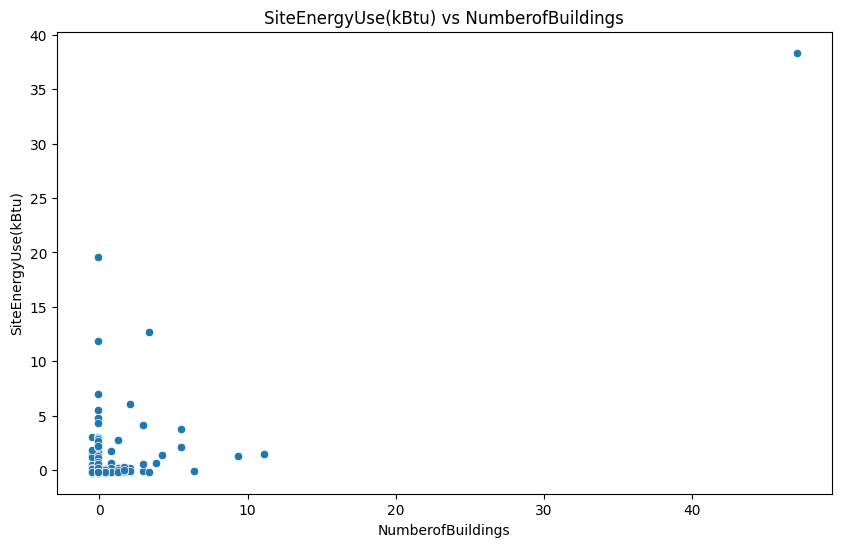

In [38]:
# scatter plot with a feature from X_trainfinal and the target y_train
plt.figure(figsize = (10,6))
sns.scatterplot(x = X_trainfinal['NumberofBuildings'], y = y_train_imputed)
plt.title('SiteEnergyUse(kBtu) vs NumberofBuildings')
plt.show()


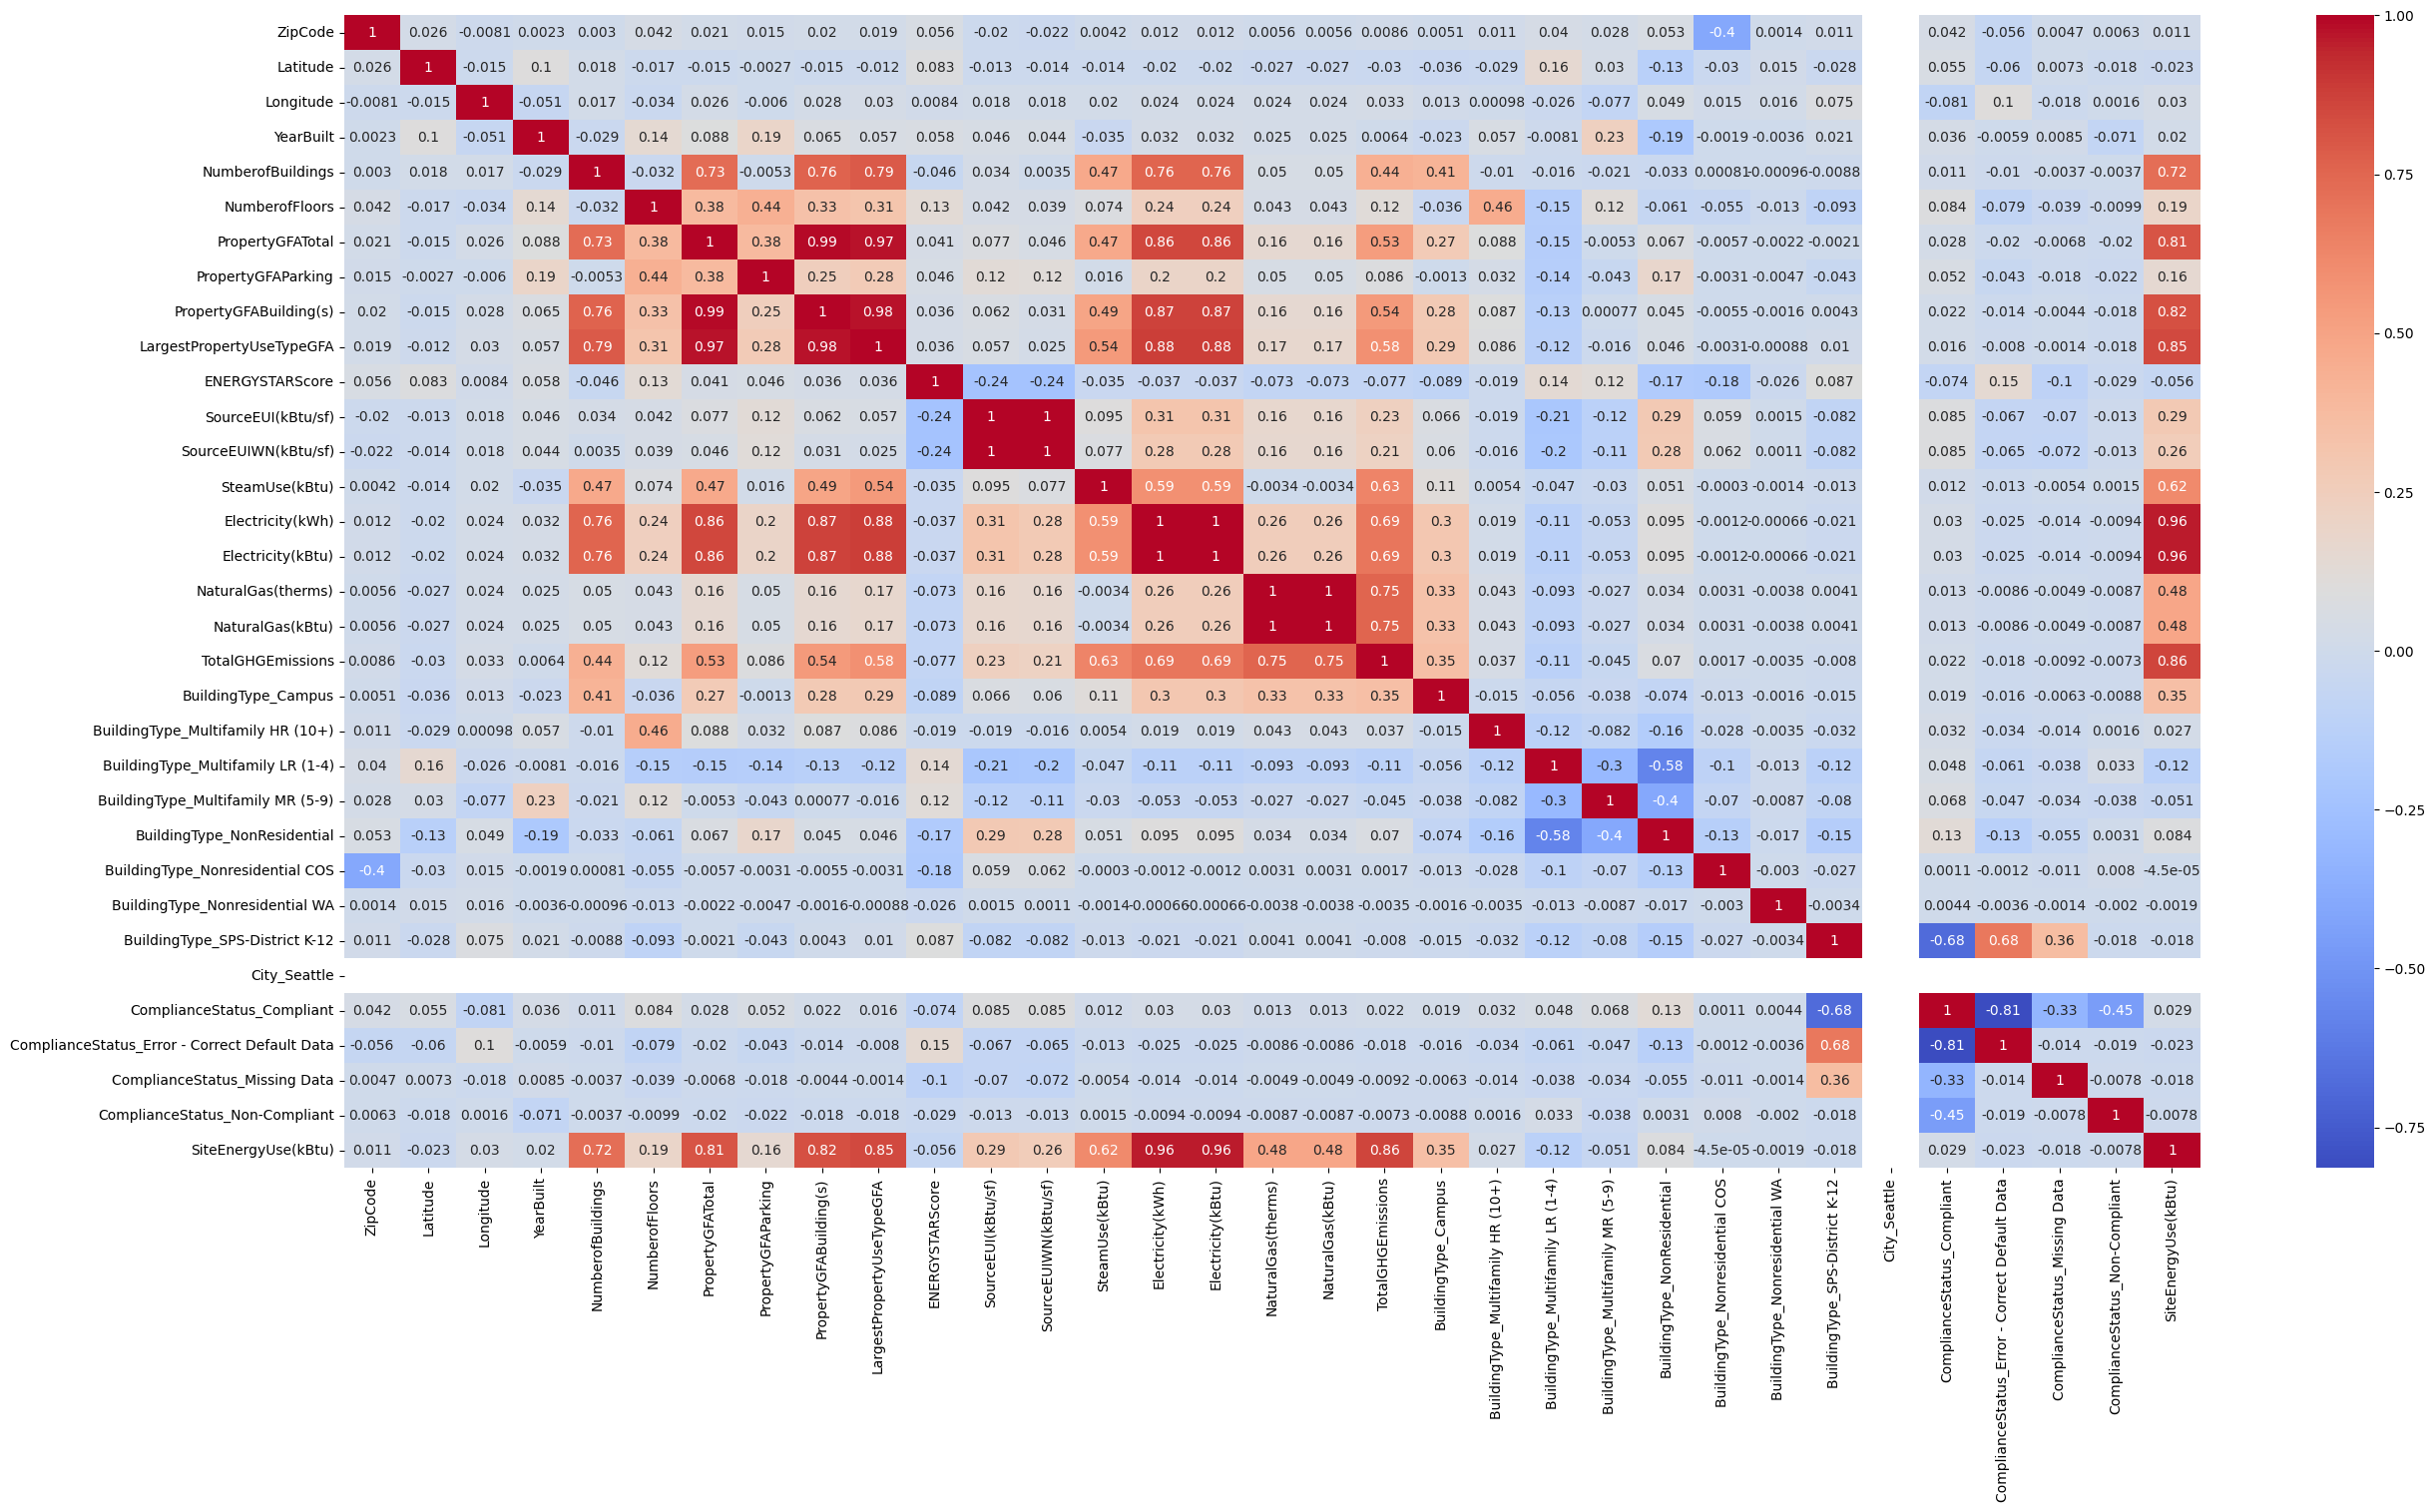

In [39]:
# heatmap
plt.figure(figsize=(30, 15))
correlation = train_df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

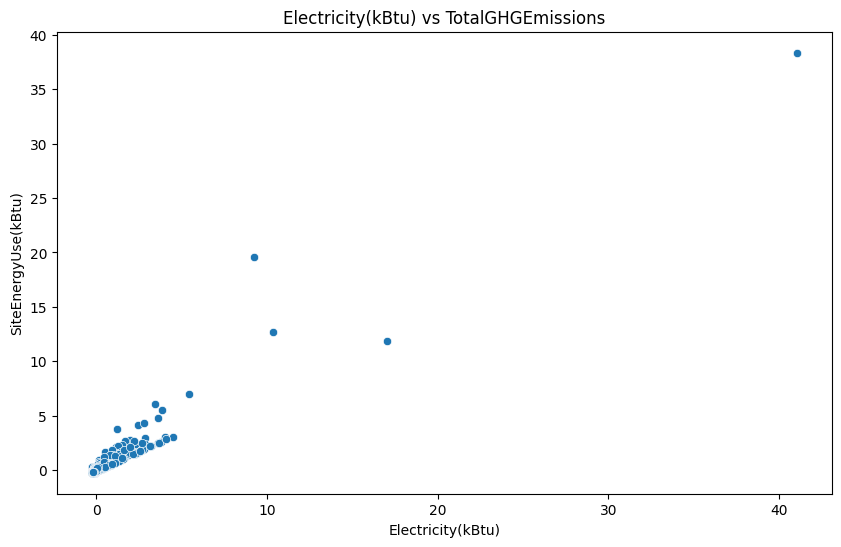

In [40]:
# plot Electricity(kBtu) with SiteEnergyUse(kBtu)
plt.figure(figsize = (10,6))
sns.scatterplot(x = X_trainfinal['Electricity(kBtu)'], y = y_train_imputed)
plt.title('Electricity(kBtu) vs TotalGHGEmissions')
plt.show()

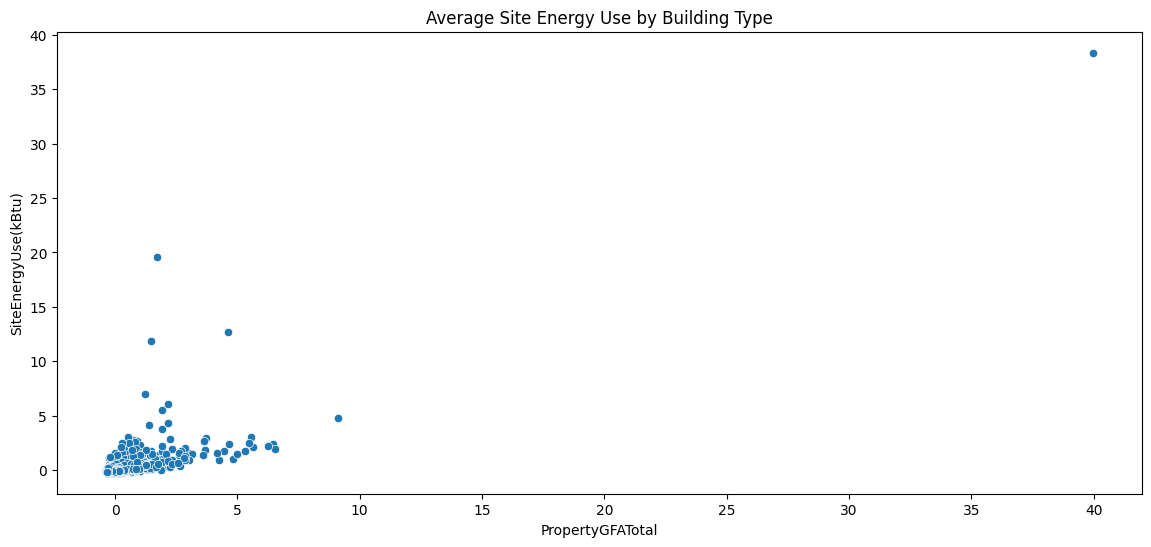

In [41]:
plt.figure(figsize=(14, 6))
sns.scatterplot(x = X_trainfinal['PropertyGFATotal'], y = y_train_imputed)

plt.title('Average Site Energy Use by Building Type')
plt.show()

MAKE PREDICTIONS

In [42]:
print(X_trainfinal.shape)

(2700, 31)


In [43]:
from tensorflow import keras
from tensorflow.keras import layers

In [44]:
model = keras.Sequential([
    layers.Dense(512, activation = 'relu',input_shape=(31,)),
    layers.Dense(512,activation = 'relu'),
    layers.Dense(512,activation = 'relu'),
    layers.Dense(1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
model.compile(
    optimizer = 'adam',
    loss = 'mae'
)

In [46]:
# Check for NaNs in your datasets
print(np.any(np.isnan(X_trainfinal)))
print(np.any(np.isnan(y_train)))
print(np.any(np.isnan(X_validfinal)))
print(np.any(np.isnan(y_valid)))

False
True
False
True


In [47]:
# Find indices with missing values in y_train and y_valid
train_missing = np.isnan(y_train)
valid_missing = np.isnan(y_valid)

In [48]:
# Check for NaNs in your datasets
print(np.any(np.isnan(X_trainfinal)))
print(np.any(np.isnan(y_train_imputed)))
print(np.any(np.isnan(X_validfinal)))
print(np.any(np.isnan(y_valid_imputed)))

False
False
False
False


In [49]:
history = model.fit(
    X_trainfinal, y_train_imputed,
    validation_data=(X_validfinal, y_valid_imputed),
    batch_size=256,
    epochs=10,
)

Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - loss: 0.2596 - val_loss: 0.0878
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0877 - val_loss: 0.0511
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0529 - val_loss: 0.0421
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0361 - val_loss: 0.0296
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0307 - val_loss: 0.0230
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0227 - val_loss: 0.0224
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0180 - val_loss: 0.0241
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0238 - val_loss: 0.0219
Epoch 9/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0173 - val_loss: 0.0268
Epoch 10/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0239 - val_loss: 0.0231


Visualize the loss against the validation loss

<Axes: >

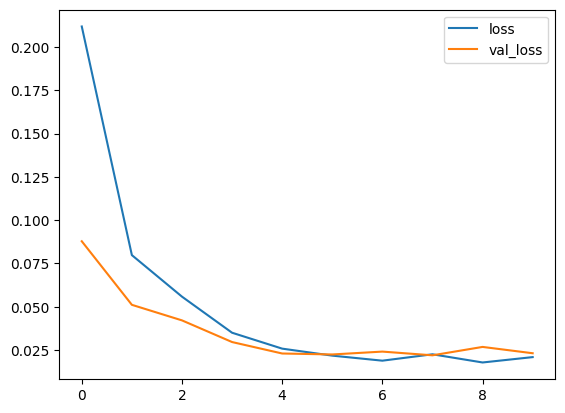

In [50]:
history_df = pd.DataFrame(history.history)
history_df.loc[:,['loss','val_loss']].plot()
